In [1]:
import sys
import logging

sys.path.append("../")
from experiments.cbo_aspirin_statin_het_example import *
import pandas as pd
import networkx as nx


In [2]:
smoke_test = False
n_iter = 400
exp = POMPSExperiment(environ.fcm, {"aspirin", 'statin'}, {'age', "bmi"},
                          environ.domain, n_iter=16 if smoke_test else n_iter,
                          objetive=OptimizationObjective.minimize,
                          droppable_scopes=[MixedPolicyScope(set()),
                                            MixedPolicyScope({PolicyComponent('aspirin', {'age', 'bmi'})}),
                                            MixedPolicyScope({PolicyComponent('statin', {'age', 'bmi'})})],
                          experiment_name=experiment_name)
exp.iterate({"smoke_test": smoke_test, "seed": 42}, smoke_test=smoke_test)

  0%|          | 0/400 [00:00<?, ?it/s]

KeyboardInterrupt caught, calling on_optimization_end() to round things up
KeyboardInterrupt caught, calling on_optimization_end() to round things up
KeyboardInterrupt caught, calling on_optimization_end() to round things up
KeyboardInterrupt caught, calling on_optimization_end() to round things up



KeyboardInterrupt



In [3]:
exp.policies_active[0][0].induced_graph().edges

OutEdgeView([('bmi', 'cancer'), ('bmi', 'Y'), ('cancer', 'Y'), ('aspirin', 'cancer'), ('aspirin', 'Y'), ('statin', 'cancer'), ('statin', 'Y'), ('age', 'cancer'), ('age', 'Y')])

In [10]:
df = pd.DataFrame(exp._results_store).reset_index()
df = df.sort_values("index")
df['EXP_ID'] = 0
df['Regret'] = 0 - df['Y']
df['Cum_Regret'] = df['Regret'].cumsum()

<AxesSubplot:>

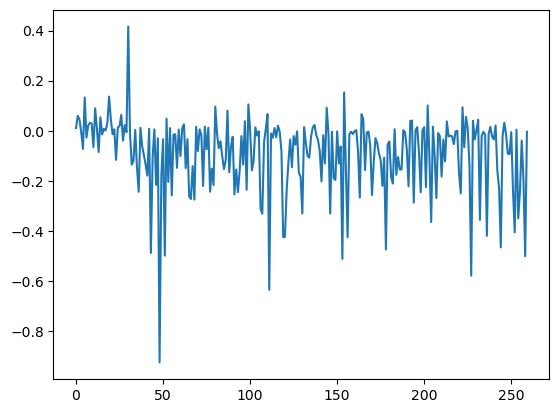

In [12]:
df.Y.plot()

<AxesSubplot:>

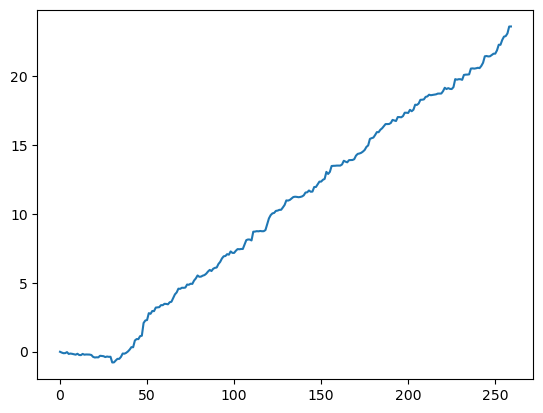

In [11]:
df.Cum_Regret.plot()

In [9]:
df

,index,bmi,age,aspirin,statin,cancer,Y,MPS,EXP_ID,Regret,Cum_Regret
0,0,27.230463,63.285622,0.000000,0.000000,0.000517,0.010427,"<aspirin, []>\t<statin, []>",0,0.989573,0.989573
1,1,26.117172,57.414066,0.500000,0.500000,0.375644,0.059371,"<aspirin, []>\t<statin, []>",0,0.940629,1.930202
2,2,27.633308,72.671669,0.750000,0.250000,0.361501,0.044439,"<aspirin, []>\t<statin, []>",0,0.955561,2.885763
3,3,26.035841,61.665348,0.072059,0.007789,0.008510,-0.006314,"<aspirin, []>\t<statin, []>",0,1.006314,3.892076
4,4,26.622271,73.260780,0.000000,0.413511,0.177735,-0.072712,"<aspirin, []>",0,1.072712,4.964788
...,...,...,...,...,...,...,...,...,...,...,...
255,255,27.894732,66.047806,0.000551,0.989083,0.992133,-0.242473,"<aspirin, []>\t<statin, []>",0,1.242473,278.887223
256,256,27.242435,63.297150,0.006139,0.992584,0.985815,-0.039340,"<aspirin, []>\t<statin, []>",0,1.039340,279.926562
257,257,27.861038,65.085083,0.000404,0.956890,0.926326,-0.193328,"<aspirin, []>\t<statin, []>",0,1.193328,281.119891
258,258,25.997091,73.602722,0.534989,0.981598,1.155973,-0.501488,"<statin, []>",0,1.501488,282.621378
